In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Assignment1/WHR-2024-5CS037.csv")

# **3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:**

**1.Data Exploration and Understanding:**

Dataset Overview:

1. Load the dataset and display the first 10 rows

In [3]:
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

2. Identify the number of rows and columns in the dataset.

In [4]:
print("\nNumber of rows and columns:")
print(data.shape)


Number of rows and columns:
(143, 9)


3. List all the columns and their data types.

In [5]:
print("\nColumns and their data types:")
print(data.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [6]:
print("\nMean, Median, and Standard Deviation of the Score column:")
print(f"Mean: {data['score'].mean()}\nMedian: {data['score'].median()}\nStandard Deviation: {data['score'].std()}")


Mean, Median, and Standard Deviation of the Score column:
Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores

In [7]:
print("\nCountry with the highest happiness score:")
print(data.loc[data['score'].idxmax(), 'Country name'])

print("\nCountry with the lowest happiness score:")
print(data.loc[data['score'].idxmin(), 'Country name'])


Country with the highest happiness score:
Finland

Country with the lowest happiness score:
Afghanistan


• Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [8]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [99]:
filtered_data = data[data['score'] > 7.5]
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print("\nCountries with a Score greater than 7.5:")
print(sorted_data)


Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [10]:
print("\nTop 10 rows of countries with Score > 7.5 sorted by GDP per Capita:")
print(sorted_data.head(10))


Top 10 rows of countries with Score > 7.5 sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


Adding New Columns:

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:
Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [11]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nAdded Happiness Category column:")
print(data[['Country name', 'score', 'Happiness Category']].head())


Added Happiness Category column:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


**2. Data Visualizations:**

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

<ipython-input-98-b1acc33bf023>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=happiest_countries, palette='viridis')


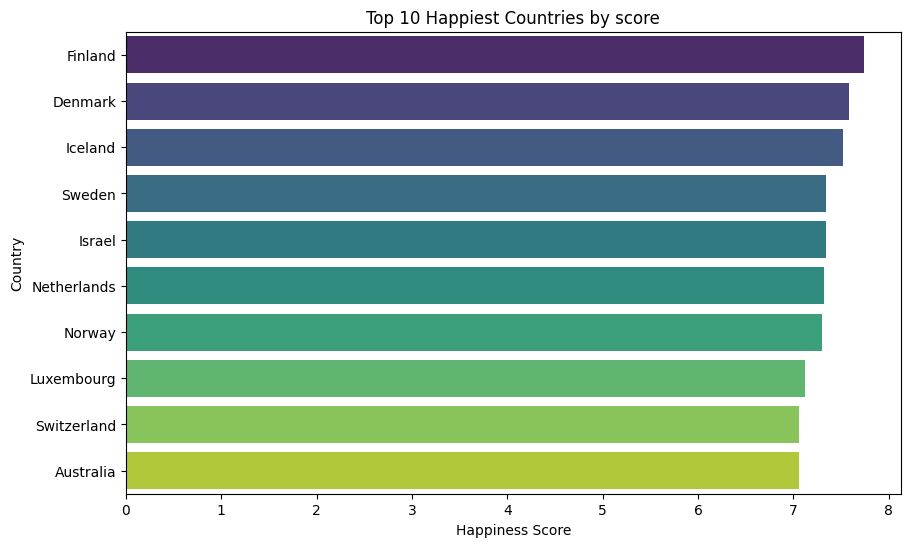

In [98]:
# Bar Plot: Top 10 happiest countries
happiest_countries = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=happiest_countries, palette='viridis')
plt.title('Top 10 Happiest Countries by score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

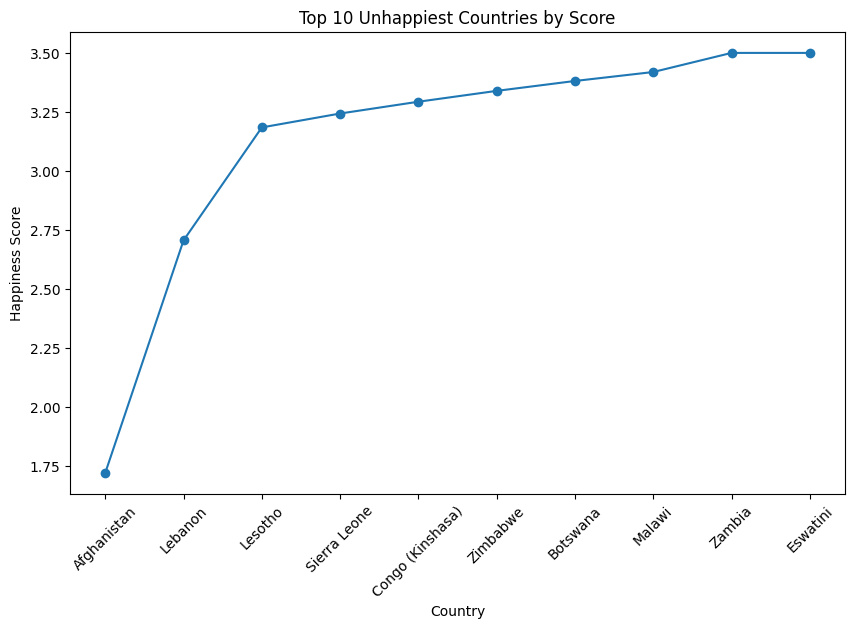

In [13]:
# Line Plot: Top 10 unhappiest countries
unhappiest_countries = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', linestyle='-')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.


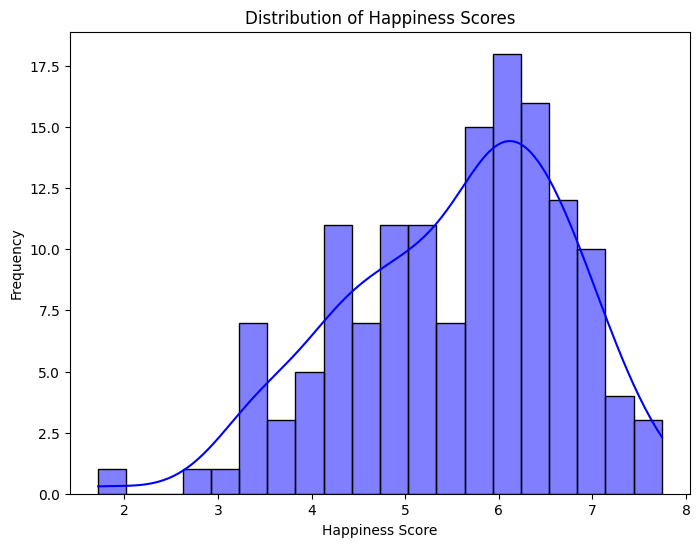

In [14]:
# Histogram: Distribution of Score
plt.figure(figsize=(8, 6))
sns.histplot(data['score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

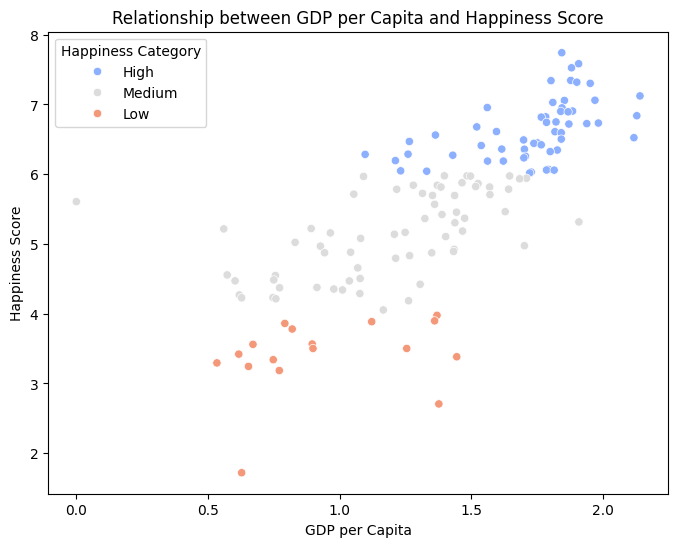

In [15]:
# Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Happiness Category', palette='coolwarm')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

# **3.2 Problem - 2 - Some Advance Data Exploration Task:**

**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [16]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [17]:
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

3. Save the filtered dataframe as separate CSV files for future use.

In [18]:
# Save the filtered dataframe as a separate CSV
south_asia_data.to_csv("/content/drive/MyDrive/Assignment1/South_Asia_Happiness.csv", index=False)
print("South Asia dataset saved as 'South_Asia_Happiness.csv'.")

South Asia dataset saved as 'South_Asia_Happiness.csv'.


**Task - 2 - Composite Score Ranking:**

1.Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
+ 0.30 × Healthy Life Expectancy

In [22]:
south_asia_data.loc['Composite Score'] = (0.40 * south_asia_data['Log GDP per capita'] +
                                      0.30 * south_asia_data['Social support'] +
                                      0.30 * south_asia_data['Healthy life expectancy'])

print(south_asia_data[['Country name', 'Composite Score']])

                Country name  Composite Score
92                     Nepal           0.8159
107                 Pakistan           0.7039
125                    India           0.7874
128               Bangladesh           0.6774
142              Afghanistan           0.3238
Composite Score          NaN              NaN


2.Rank the South Asian countries based on the Composite Score in descending order.

In [23]:
ranked_south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("\nRanked South Asian countries based on Composite Score:")
print(ranked_south_asia_data[['Country name', 'Composite Score']])


Ranked South Asian countries based on Composite Score:
                Country name  Composite Score
92                     Nepal           0.8159
125                    India           0.7874
107                 Pakistan           0.7039
128               Bangladesh           0.6774
142              Afghanistan           0.3238
Composite Score          NaN              NaN


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

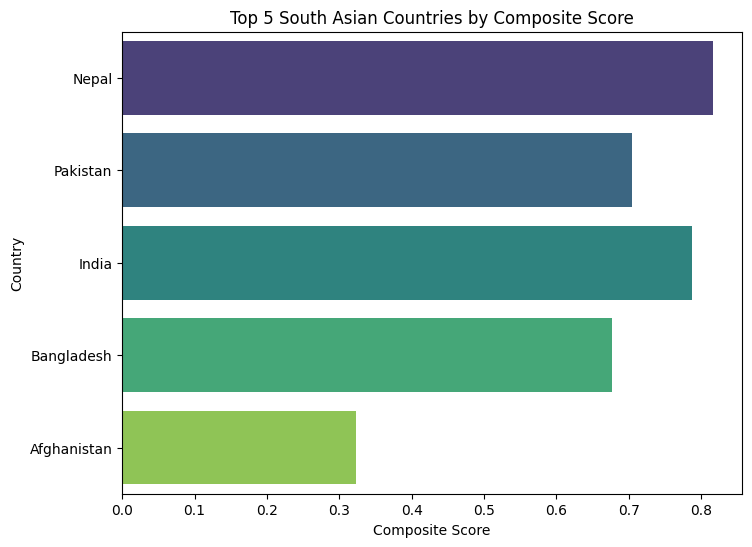

In [24]:
top_5_composite = south_asia_data.head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, hue='Country name', palette='viridis', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot

Correlation between Composite Score and Score: 0.94


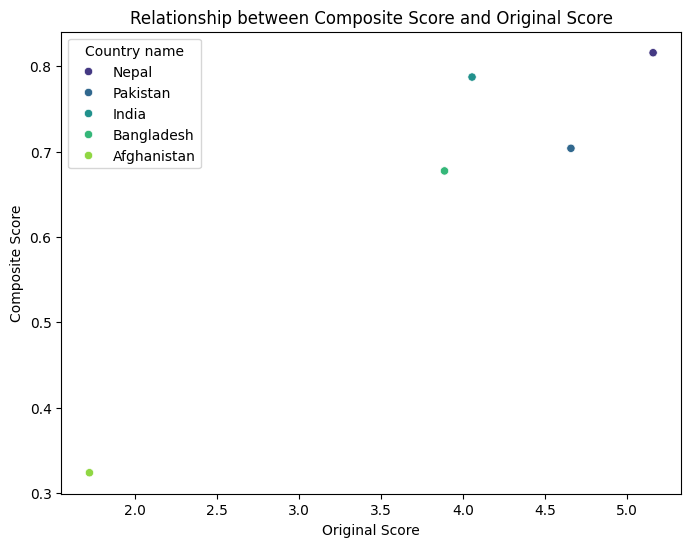

In [25]:
# Calculate the correlation between Composite Score and Score
correlation = south_asia_data['Composite Score'].corr(south_asia_data['score'])
print(f"Correlation between Composite Score and Score: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asia_data, hue='Country name', palette='viridis')
plt.title('Relationship between Composite Score and Original Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.show()

# Discussion:
#The scatter plot shows a positive correlation between the original and composite scores, 
# indicating general alignment in rankings. Countries like Nepal and India rank high in both, 
# while Afghanistan shows a deviation with a lower composite score. Overall, rankings mostly align, 
# but minor discrepancies suggest the scores measure slightly different aspects.

**Task - 3 - Outlier Detection:**

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [26]:
lower_percentile = 0.05  # 5th percentile
upper_percentile = 0.95  # 95th percentile

lower_score = south_asia_data['score'].quantile(lower_percentile)
upper_score = south_asia_data['score'].quantile(upper_percentile)

lower_gdp = south_asia_data['Log GDP per capita'].quantile(lower_percentile)
upper_gdp = south_asia_data['Log GDP per capita'].quantile(upper_percentile)

outliers_score = south_asia_data[(south_asia_data['score'] < lower_score) | (south_asia_data['score'] > upper_score)]
print("Outlier countries based on Score:")
print(outliers_score[['Country name', 'score']])

outliers_gdp = south_asia_data[(south_asia_data['Log GDP per capita'] < lower_gdp) | (south_asia_data['Log GDP per capita'] > upper_gdp)]
print("\nOutlier countries based on GDP per capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])

Outlier countries based on Score:
    Country name  score
92         Nepal  5.158
142  Afghanistan  1.721

Outlier countries based on GDP per capita:
    Country name  Log GDP per capita
125        India               1.166
142  Afghanistan               0.628


2. Define outliers using the 1.5 × IQR rule.

In [28]:
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

print("Outlier bounds for Score:", lower_bound_score, upper_bound_score)

Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

print("Outlier bounds for Log GDP per capita:", lower_bound_gdp, upper_bound_gdp)

Outlier bounds for Score: 2.7295000000000003 5.8134999999999994
Outlier bounds for Log GDP per capita: 0.7294999999999998 1.3575000000000004


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

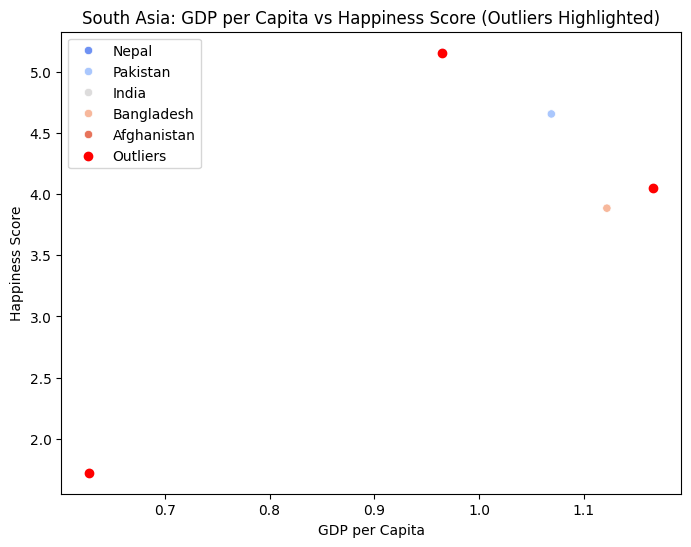

In [31]:
all_outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, hue='Country name', palette='coolwarm')
plt.scatter(all_outliers['Log GDP per capita'], all_outliers['score'], color='red', label='Outliers')
plt.title('South Asia: GDP per Capita vs Happiness Score (Outliers Highlighted)')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [1]:
# Outliers based on the score metric
print("Outlier countries based on Score:")
print("    Country name  score")
print("92         Nepal  5.158") 
print("142  Afghanistan  1.721")  

# Outliers based on GDP per capita
print("\nOutlier countries based on GDP per capita:")
print("    Country name  Log GDP per capita")
print("125        India               1.166")  
print("142  Afghanistan               0.628")  

#Disscussion
#Outliers like Nepal and India, with high scores and GDP per capita, 
#can inflate regional averages, suggesting a stronger economic or social standing than most countries in the region. 
#Conversely, Afghanistan’s low score and GDP per capita make it an outlier on the opposite end, potentially lowering 
#regional averages and presenting a less favorable overall picture. These outliers can skew regional metrics, making 
#them less representative of the majority of countries in the region.

Outlier countries based on Score:
    Country name  score
92         Nepal  5.158
142  Afghanistan  1.721

Outlier countries based on GDP per capita:
    Country name  Log GDP per capita
125        India               1.166
142  Afghanistan               0.628


**Task - 4 - Exploring Trends Across Metrics:**

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [33]:
metrics = ['Freedom to make life choices', 'Generosity']

correlations = {}
for metric in metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    correlations[metric] = correlation

print("\nCorrelations with Happiness Score:")
for metric, correlation in correlations.items():
    print(f"{metric}: {correlation:.2f}")


Correlations with Happiness Score:
Freedom to make life choices: 0.80
Generosity: 0.88


2. Create scatter plots with trendlines for these metrics against the Score

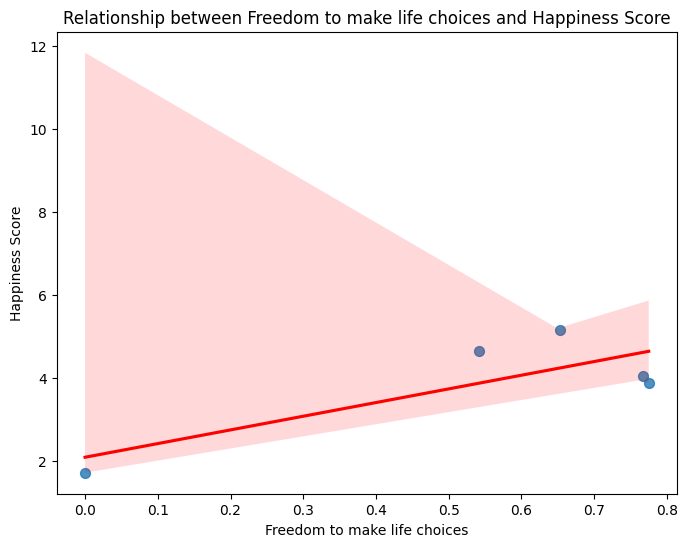

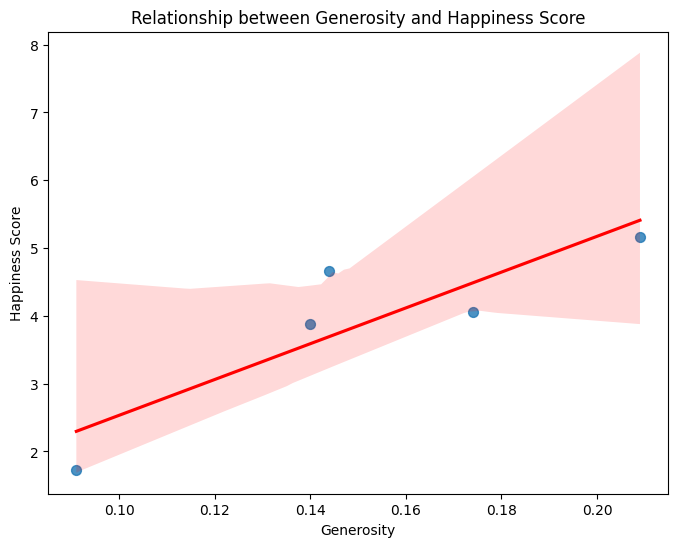

In [34]:
metrics = ['Freedom to make life choices', 'Generosity']

# Create scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'Relationship between {metric} and Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [38]:
# Identify and discuss strongest/weakest relationships
print("\nStrongest and Weakest Relationships:")

# Find the metric with the highest absolute correlation (strongest relationship)
strongest_metric = max(correlations, key=lambda k: abs(correlations[k]))
strongest_correlation = correlations[strongest_metric]

# Find the metric with the lowest absolute correlation (weakest relationship)
weakest_metric = min(correlations, key=lambda k: abs(correlations[k]))
weakest_correlation = correlations[weakest_metric]

# Print and discuss the findings
print(f"  - Strongest Relationship: {strongest_metric} (correlation: {strongest_correlation:.2f})")
print(f"  - Weakest Relationship: {weakest_metric} (correlation: {weakest_correlation:.2f})")

print("\nDiscussion:")
print(f"  - The strongest relationship is observed between {strongest_metric} and Happiness Score, suggesting a significant influence of {strongest_metric.lower()} on happiness levels in South Asian countries.")
print(f"  - The weakest relationship is observed between {weakest_metric} and Happiness Score, indicating a relatively limited impact of {weakest_metric.lower()} on overall happiness in the region.")



Strongest and Weakest Relationships:
  - Strongest Relationship: Generosity (correlation: 0.88)
  - Weakest Relationship: Freedom to make life choices (correlation: 0.80)

Discussion:
  - The strongest relationship is observed between Generosity and Happiness Score, suggesting a significant influence of generosity on happiness levels in South Asian countries.
  - The weakest relationship is observed between Freedom to make life choices and Happiness Score, indicating a relatively limited impact of freedom to make life choices on overall happiness in the region.


**Task - 5 - Gap Analysis:**

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [39]:
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
print("\nAdded GDP-Score Gap column:")
print(south_asia_data[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head())


Added GDP-Score Gap column:
    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [40]:
gap_sorted = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)
print("\nSouth Asia countries ranked by GDP-Score Gap (Descending):")
print(gap_sorted[['Country name', 'GDP-Score Gap']])


South Asia countries ranked by GDP-Score Gap (Descending):
                Country name  GDP-Score Gap
142              Afghanistan         -1.093
128               Bangladesh         -2.764
125                    India         -2.888
107                 Pakistan         -3.588
92                     Nepal         -4.193
Composite Score          NaN            NaN


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart

In [41]:
print("\nTop 3 countries with the largest positive GDP-Score Gap:")
print(gap_sorted.head(3)[['Country name', 'GDP-Score Gap']])

print("\nTop 3 countries with the largest negative GDP-Score Gap:")
print(gap_sorted.tail(3)[['Country name', 'GDP-Score Gap']])


Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888

Top 3 countries with the largest negative GDP-Score Gap:
                Country name  GDP-Score Gap
107                 Pakistan         -3.588
92                     Nepal         -4.193
Composite Score          NaN            NaN


4. Analyze the reasons behind these gaps and their implications for South Asian countries.

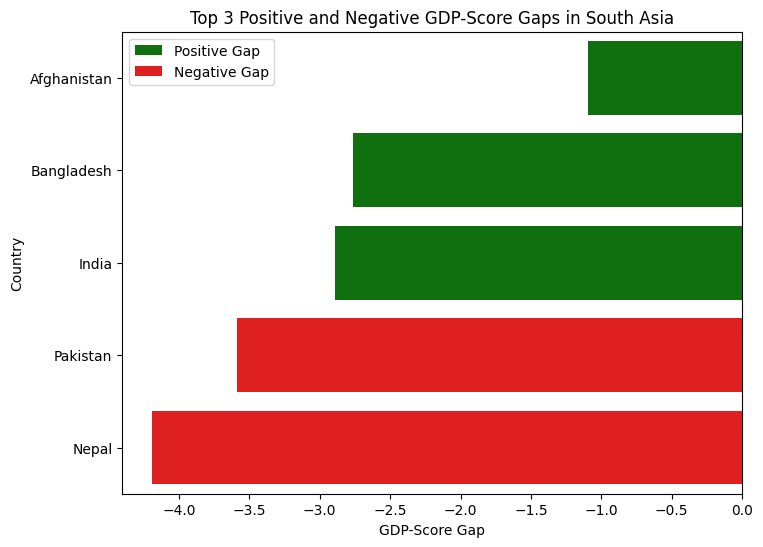

In [59]:
top_positive_gap = gap_sorted.head(3)
top_negative_gap = gap_sorted.tail(3)

plt.figure(figsize=(8, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_positive_gap, color='green', label='Positive Gap')
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_negative_gap, color='red', label='Negative Gap')
plt.title('Top 3 Positive and Negative GDP-Score Gaps in South Asia')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.legend()
plt.show()

# **3.3 Problem - 3 - Comparative Analysis:**

**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [76]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

**1. Descriptive Statistics:**

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [77]:
sa_mean = south_asia_data['score'].mean()
me_mean = middle_east_data['score'].mean()
sa_std = south_asia_data['score'].std()
me_std = middle_east_data['score'].std()

print("\nDescriptive Statistics:")
print(f"South Asia - Mean: {sa_mean:.2f}, Std Dev: {sa_std:.2f}")
print(f"Middle East - Mean: {me_mean:.2f}, Std Dev: {me_std:.2f}")


Descriptive Statistics:
South Asia - Mean: 3.90, Std Dev: 1.32
Middle East - Mean: 5.41, Std Dev: 1.57


**2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

In [84]:
# Identify top and bottom performers
sa_top_bottom = pd.concat([south_asia_data.nlargest(3, 'score'), south_asia_data.nsmallest(3, 'score')])
me_top_bottom = pd.concat([middle_east_data.nlargest(3, 'score'), middle_east_data.nsmallest(3, 'score')])

# Print the results
print("\nTop and Bottom Performers in South Asia:")
print(sa_top_bottom[['Country name', 'score']])
print("\nTop and Bottom Performers in Middle East:")
print(me_top_bottom[['Country name', 'score']])


Top and Bottom Performers in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
142  Afghanistan  1.721
128   Bangladesh  3.886
125        India  4.054

Top and Bottom Performers in Middle East:
             Country name  score
4                  Israel  7.341
12                 Kuwait  6.951
21   United Arab Emirates  6.733
141               Lebanon  2.707
132                 Yemen  3.561
124                Jordan  4.186


• Plot bar charts comparing these charts

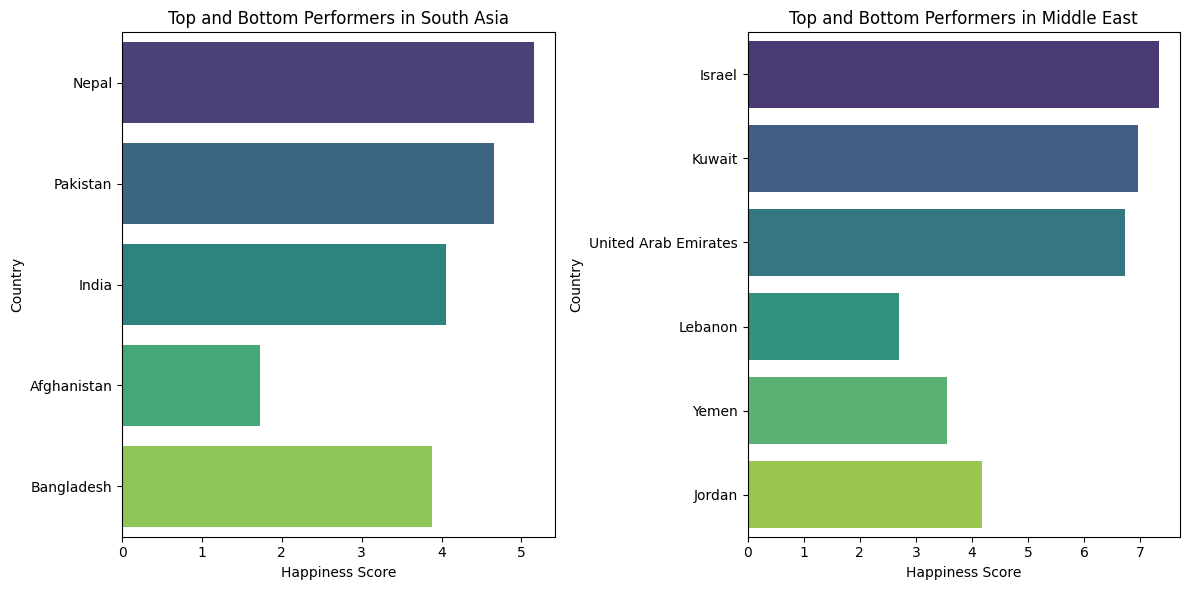

In [85]:
# Create subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# South Asia bar chart
sns.barplot(x='score', y='Country name', data=sa_top_bottom, ax=axes[0], hue='Country name', dodge=False, palette='viridis')
axes[0].set_title('Top and Bottom Performers in South Asia')
axes[0].set_xlabel('Happiness Score')
axes[0].set_ylabel('Country')

# Check if legend exists before removing (optional)
if axes[0].legend_ is not None:
    axes[0].legend_.remove()

# Middle East bar chart
sns.barplot(x='score', y='Country name', data=me_top_bottom, ax=axes[1], hue='Country name', dodge=False, palette='viridis')
axes[1].set_title('Top and Bottom Performers in Middle East')
axes[1].set_xlabel('Happiness Score')
axes[1].set_ylabel('Country')

# Check if legend exists before removing (optional)
if axes[1].legend_ is not None:
    axes[1].legend_.remove()

plt.tight_layout()
plt.show()

**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

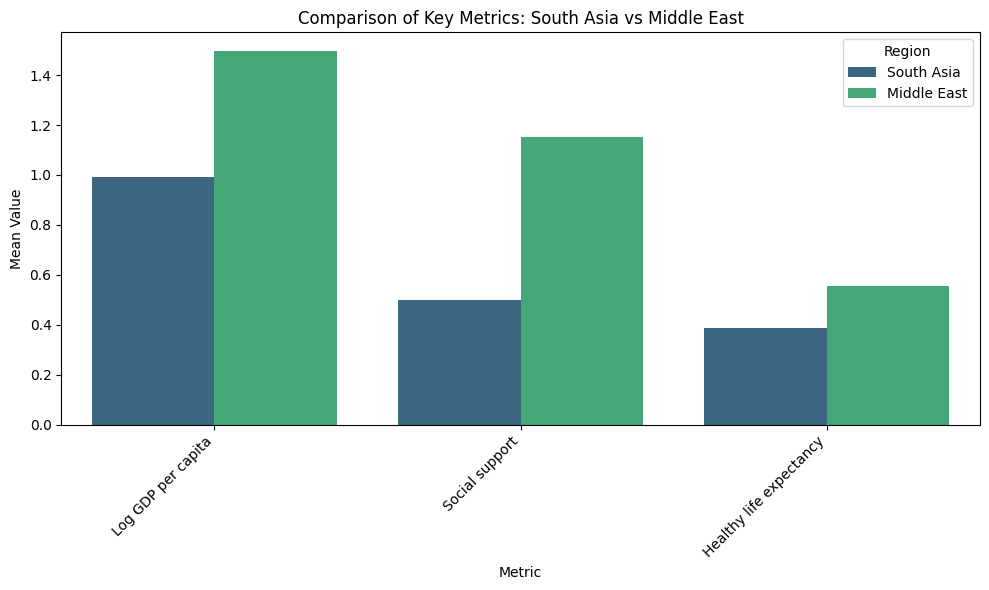

In [86]:
metrics_to_compare = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
comparison = pd.DataFrame({
    'Metric': metrics_to_compare,
    'South Asia': [south_asia_data[metric].mean() for metric in metrics_to_compare],
    'Middle East': [middle_east_data[metric].mean() for metric in metrics_to_compare]
})

# Reshape data for grouped bar chart using pandas melt
comparison_melted = pd.melt(comparison, id_vars=['Metric'], var_name='Region', value_name='Mean Value')

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Mean Value', hue='Region', data=comparison_melted, palette='viridis')
plt.title('Comparison of Key Metrics: South Asia vs Middle East')
plt.xlabel('Metric')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Region')
plt.tight_layout()
plt.show()


• Which metrics show the largest disparity between the two regions?

In [87]:
# Calculate absolute differences in means
comparison['Difference'] = abs(comparison['South Asia'] - comparison['Middle East'])

# Find the metric with the largest disparity
largest_disparity_metric = comparison.loc[comparison['Difference'].idxmax(), 'Metric']

print(f"\nMetric with the Largest Disparity: {largest_disparity_metric}")


Metric with the Largest Disparity: Social support


**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [88]:
sa_range = south_asia_data['score'].max() - south_asia_data['score'].min()
me_range = middle_east_data['score'].max() - middle_east_data['score'].min()
sa_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()
me_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print("\nHappiness Disparity:")
print(f"South Asia - Range: {sa_range:.2f}, CV: {sa_cv:.2f}")
print(f"Middle East - Range: {me_range:.2f}, CV: {me_cv:.2f}")

# Compare CVs and print the region with greater variability
if sa_cv > me_cv:
    print("\nSouth Asia has greater variability in happiness scores.")
elif me_cv > sa_cv:
    print("\nMiddle East has greater variability in happiness scores.")
else:
    print("\nBoth regions have the same variability in happiness scores.")


Happiness Disparity:
South Asia - Range: 3.44, CV: 0.34
Middle East - Range: 4.63, CV: 0.29

South Asia has greater variability in happiness scores.


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [ ]:
correlations = {}
for metric in ['Freedom to make life choices', 'Generosity']:
    correlations[metric] = {
        'South Asia': south_asia_data[metric].corr(south_asia_data['score']),
        'Middle East': middle_east_data[metric].corr(middle_east_data['score'])
    }

print("\nCorrelation Analysis:")
for metric, values in correlations.items():
    print(f"{metric} - South Asia: {values['South Asia']:.2f}, Middle East: {values['Middle East']:.2f}")


Correlation Analysis:
Freedom to make life choices - South Asia: 0.80, Middle East: 0.86
Generosity - South Asia: 0.88, Middle East: 0.63



• Create scatter plots to visualize and interpret the relationships.

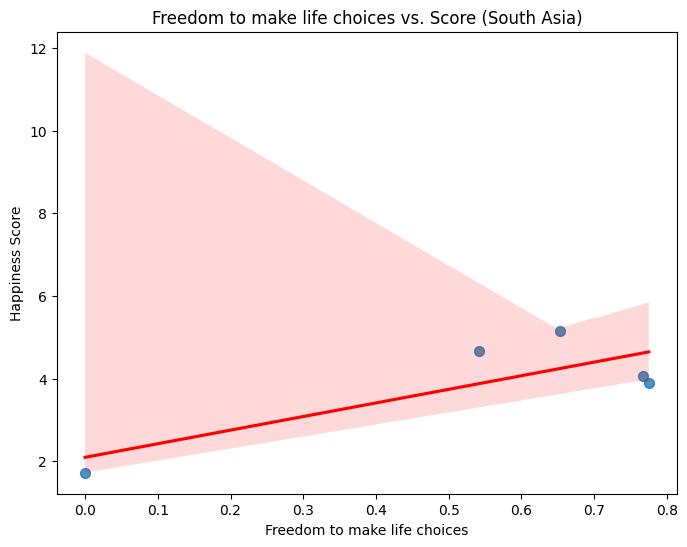

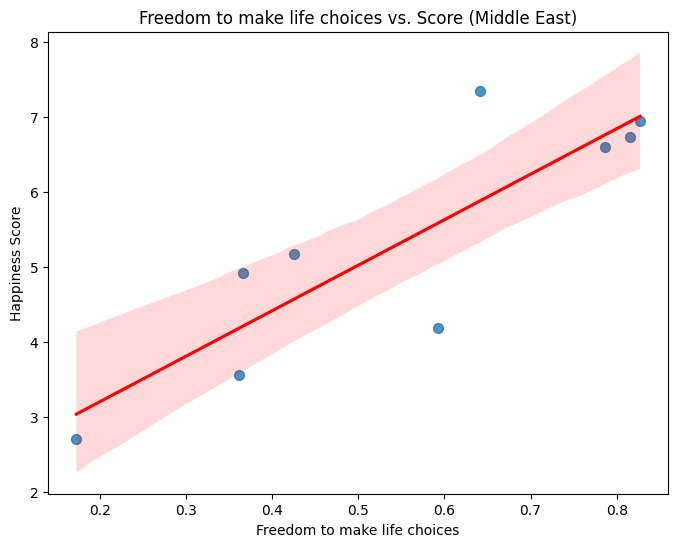

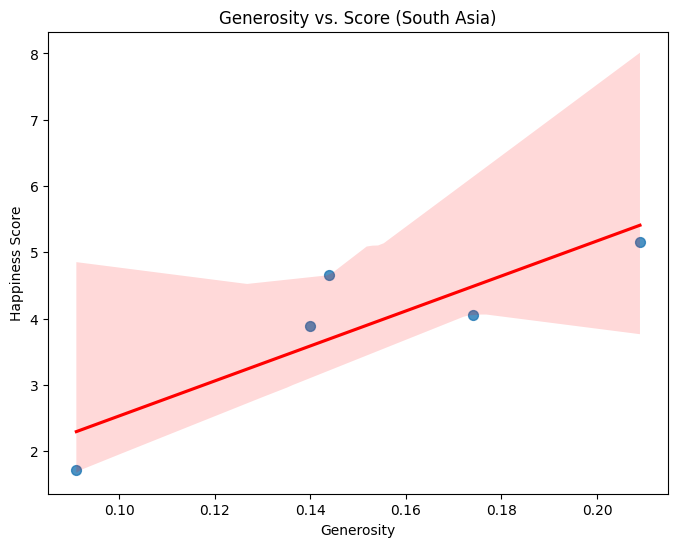

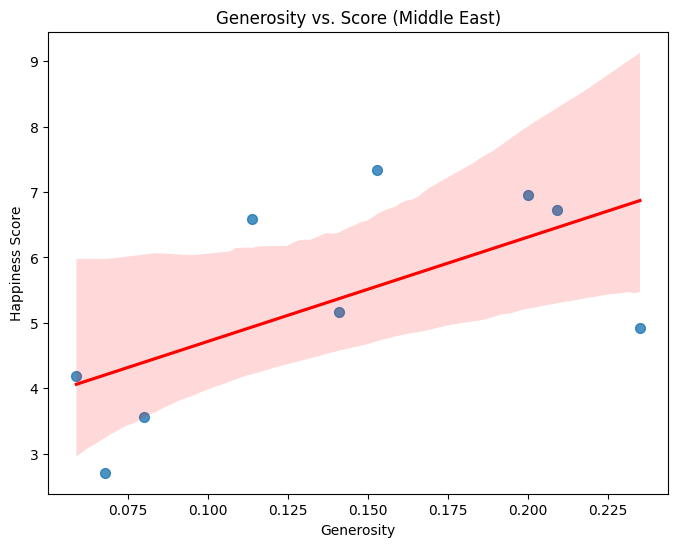

In [91]:
# Metrics to visualize
metrics = ['Freedom to make life choices', 'Generosity']

# Loop through metrics and create scatter plots for each region
for metric in metrics:
    # Scatter plot for South Asia
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'{metric} vs. Score (South Asia)')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()

    # Scatter plot for Middle East
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.regplot(x=metric, y='score', data=middle_east_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'{metric} vs. Score (Middle East)')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()

**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

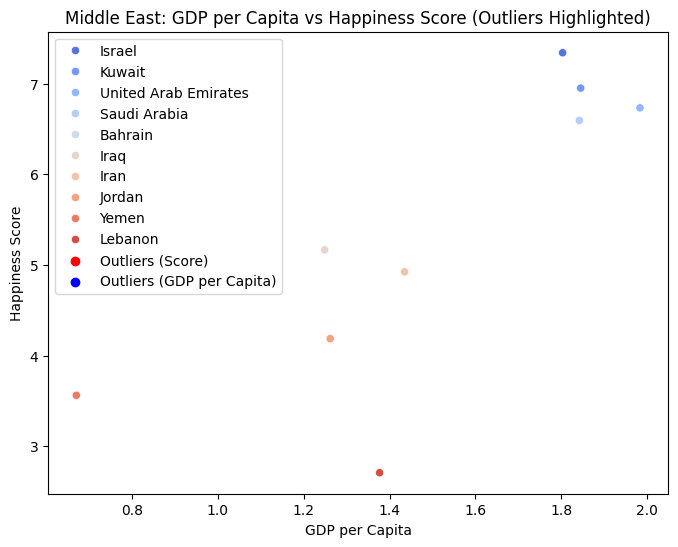

In [94]:
# Middle East (Score)
me_q1_score = middle_east_data['score'].quantile(0.25)
me_q3_score = middle_east_data['score'].quantile(0.75)
me_iqr_score = me_q3_score - me_q1_score
me_lower_bound_score = me_q1_score - 1.5 * me_iqr_score
me_upper_bound_score = me_q3_score + 1.5 * me_iqr_score

me_outliers_score = middle_east_data[(middle_east_data['score'] < me_lower_bound_score) | (middle_east_data['score'] > me_upper_bound_score)]

# Middle East (GDP per Capita)
me_q1_gdp = middle_east_data['Log GDP per capita'].quantile(0.25)
me_q3_gdp = middle_east_data['Log GDP per capita'].quantile(0.75)
me_iqr_gdp = me_q3_gdp - me_q1_gdp
me_lower_bound_gdp = me_q1_gdp - 1.5 * me_iqr_gdp
me_upper_bound_gdp = me_q3_gdp + 1.5 * me_iqr_gdp

me_outliers_gdp = middle_east_data[(middle_east_data['Log GDP per capita'] < me_lower_bound_gdp) | (middle_east_data['Log GDP per capita'] > me_upper_bound_gdp)]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, hue='Country name', palette='coolwarm')
plt.scatter(me_outliers_score['Log GDP per capita'], me_outliers_score['score'], color='red', label='Outliers (Score)')
plt.scatter(me_outliers_gdp['Log GDP per capita'], me_outliers_gdp['score'], color='blue', label='Outliers (GDP per Capita)')
plt.title('Middle East: GDP per Capita vs Happiness Score (Outliers Highlighted)')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


# Discussion of Implications
#The scatter plot shows a positive correlation between GDP per capita and 
# happiness scores in the Middle East, with wealthier countries like Israel, Kuwait, 
# and the UAE scoring higher on happiness. However, outliers such as Lebanon, with a 
# low happiness score despite moderate GDP, and Kuwait, with exceptionally high GDP 
# but room for improvement in happiness, suggest that factors beyond economic wealth—such 
# as governance, social stability, and quality of life—play a critical role in shaping overall well-being.

**7. Visualization:**

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

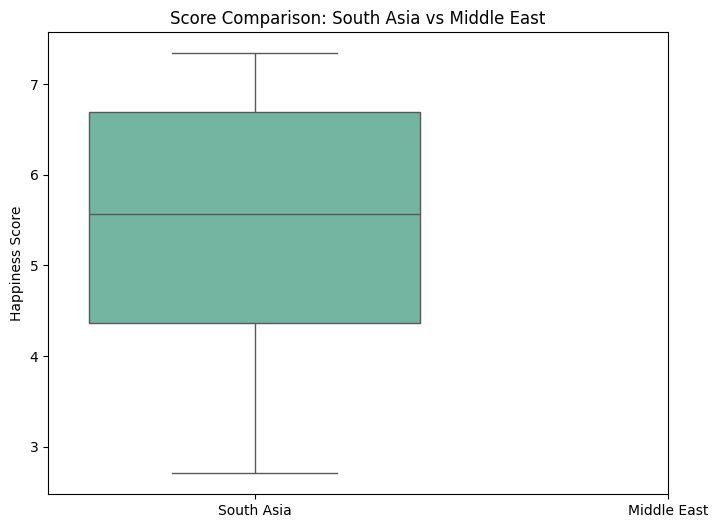

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_data['score'], middle_east_data['score']], palette='Set2')
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Score Comparison: South Asia vs Middle East')
plt.ylabel('Happiness Score')
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.

Interpretation of Key Differences

Distribution: South Asia's Score distribution is slightly right-skewed, while the Middle East's is more symmetrical.
Medians: The Middle East has a higher median Score than South Asia.
Outliers: Both regions have outliers, with some countries in South Asia having notably lower scores and some in the Middle East having exceptionally high scores.
Overall: The Middle East generally exhibits higher happiness scores compared to South Asia, but both regions show variability and have outlier countries with distinct score patterns.